# Malware classify With Machine Learning

## Install library

In [1]:
# !pip install numpy
# !pip install pandas
# !pip install scikit-learn
# !pip install matplotlib

## 1. Import thư viện

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

## 2. Load Dataset

In [3]:
data = pd.read_csv('dataset.csv')

In [4]:
data = data.drop('packer_type',axis=1)

In [5]:
data.columns

Index(['e_cblp', 'e_cp', 'e_cparhdr', 'e_maxalloc', 'e_sp', 'e_lfanew',
       'NumberOfSections', 'CreationYear', 'FH_char0', 'FH_char1', 'FH_char2',
       'FH_char3', 'FH_char4', 'FH_char5', 'FH_char6', 'FH_char7', 'FH_char8',
       'FH_char9', 'FH_char10', 'FH_char11', 'FH_char12', 'FH_char13',
       'FH_char14', 'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'OH_DLLchar0', 'OH_DLLchar1',
       'OH_DLLchar2', 'OH_DLLchar3', 'OH_DLLchar4', 'OH_DLLchar5',
       'OH_DLLchar6', 'OH_DLLchar7', 'OH_DLLchar8', 'OH_DLLchar9',
       'OH_DLLchar10', 'SizeOfStackReserve', 'SizeO

In [6]:
data.groupby(data['class']).size()

class
0     441
1    8967
dtype: int64

### Tổng 9.408 data:
- 441 là mẫu an toàn
- 8967 là malware.

In [7]:
features = data.iloc[:, :-1].values

### Lấy ra cột label malware để so sánh

In [8]:
ifMalware = data.iloc[:,-1].values

### Sử dụng 75% dataset để train, 25% để test

In [9]:
features_train, features_test, ifMalware_train, ifMalware_test = train_test_split(features, ifMalware, test_size=0.25)

## 3. Training

### 3.1 - Decision Tree

In [10]:
dtModel = DecisionTreeClassifier()
dtModel.fit(features_train, ifMalware_train)
dtPredict = dtModel.predict(features_test)
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != dtPredict).sum(),features_test.shape[0]))
print("\nBáo cáo chi tiết:\n")
print(classification_report(ifMalware_test, dtPredict))

Số lượng test có nhãn sai (mislabeled): 9 / 2352 

Báo cáo chi tiết:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       116
           1       1.00      1.00      1.00      2236

    accuracy                           1.00      2352
   macro avg       0.99      0.97      0.98      2352
weighted avg       1.00      1.00      1.00      2352



### 3.2 - Random Forest

In [11]:
rfModel = RandomForestClassifier()
rfModel.fit(features_train, ifMalware_train)
rfPredict = rfModel.predict(features_test)
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != rfPredict).sum(),features_test.shape[0]))
print("\nBáo cáo chi tiết:\n")
print(classification_report(ifMalware_test, rfPredict))

Số lượng test có nhãn sai (mislabeled): 8 / 2352 

Báo cáo chi tiết:

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       116
           1       1.00      1.00      1.00      2236

    accuracy                           1.00      2352
   macro avg       0.99      0.97      0.98      2352
weighted avg       1.00      1.00      1.00      2352



### 3.3 -  KNN (K Nearest Neighbors)

In [12]:
knModel = KNeighborsClassifier(n_neighbors=1)
knModel.fit(features_train, ifMalware_train)
knPredict = knModel.predict(features_test)
print("Số lượng test có nhãn sai (mislabeled): %d / %d " % ((ifMalware_test != knPredict).sum(),features_test.shape[0]))
print("\nBáo cáo chi tiết:\n")
print(classification_report(ifMalware_test, knPredict))

Số lượng test có nhãn sai (mislabeled): 31 / 2352 

Báo cáo chi tiết:

              precision    recall  f1-score   support

           0       0.91      0.81      0.86       116
           1       0.99      1.00      0.99      2236

    accuracy                           0.99      2352
   macro avg       0.95      0.90      0.93      2352
weighted avg       0.99      0.99      0.99      2352



## 4.1 Visualization  - Decision tree

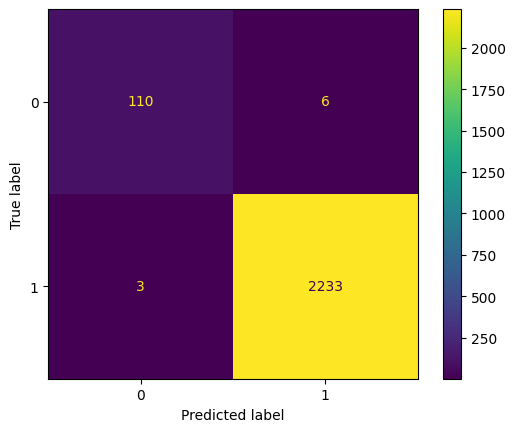

In [13]:
ConfusionMatrixDisplay.from_estimator(dtModel,features_test,ifMalware_test)

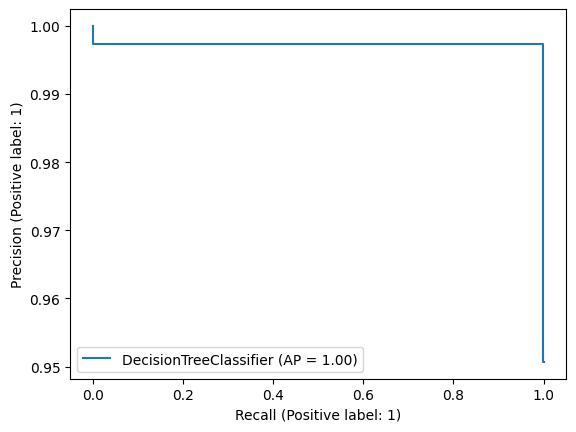

In [14]:
PrecisionRecallDisplay.from_estimator(dtModel,features_test,ifMalware_test)

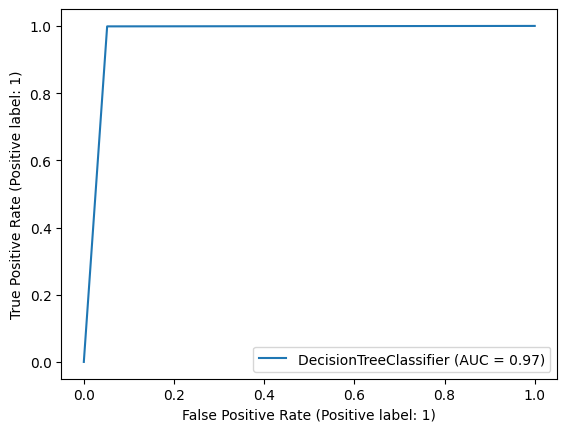

In [15]:
RocCurveDisplay.from_estimator(dtModel,features_test,ifMalware_test)

## 4.1 Visualization  - Random Forest

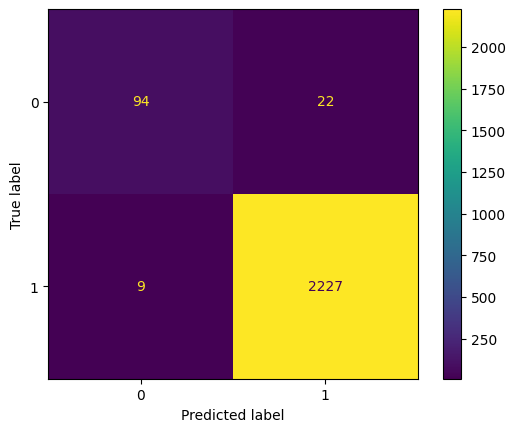

In [16]:
ConfusionMatrixDisplay.from_estimator(knModel,features_test,ifMalware_test)

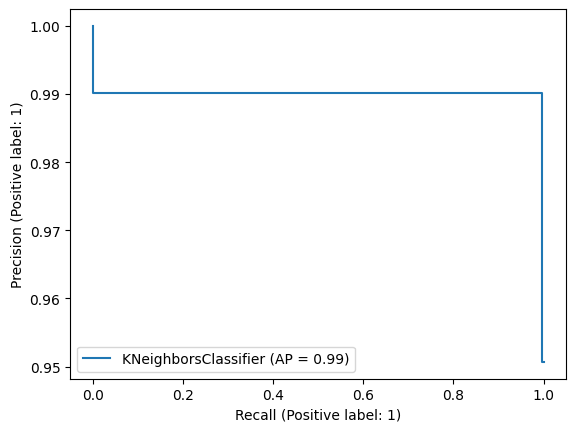

In [17]:
PrecisionRecallDisplay.from_estimator(knModel,features_test,ifMalware_test)

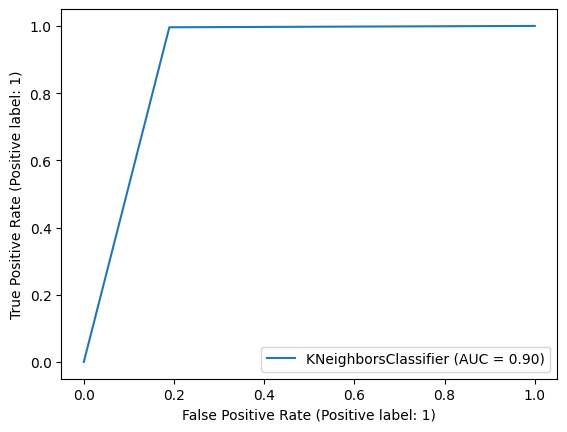

In [18]:
RocCurveDisplay.from_estimator(knModel,features_test,ifMalware_test)

## 4.1 Visualization  - KNN (K Nearest Neighbors)

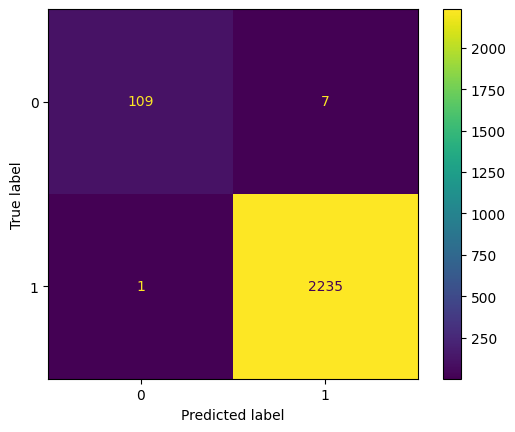

In [19]:
ConfusionMatrixDisplay.from_estimator(rfModel,features_test,ifMalware_test)

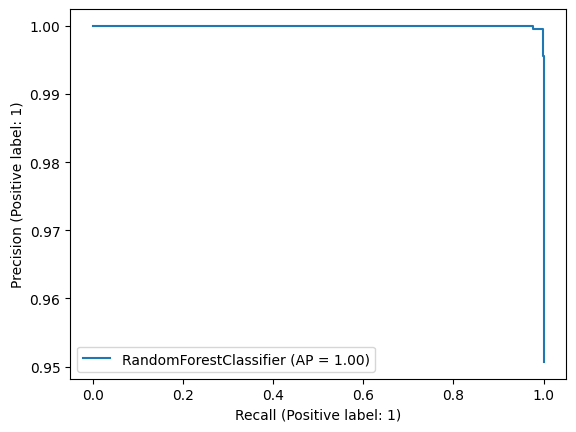

In [20]:
PrecisionRecallDisplay.from_estimator(rfModel,features_test,ifMalware_test)

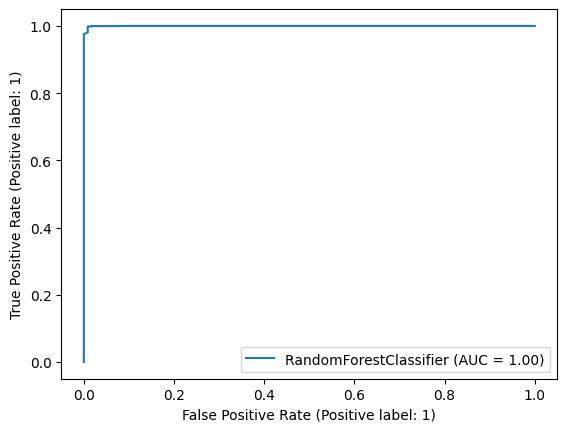

In [21]:
RocCurveDisplay.from_estimator(rfModel,features_test,ifMalware_test)

## 5. Export Model

In [22]:
import joblib

joblib.dump(dtModel, 'decision_tree_model.pkl')
joblib.dump(knModel, 'random_forest_model.pkl')
joblib.dump(rfModel, 'K_Nearest_Neighbors_model.pkl')

['K_Nearest_Neighbors_model.pkl']